#Lab 2 (Naive bayes )


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Naive1.csv')
df

,Patient ID,Name,Age,Gender,Chol,Target
0,1,William,35,Male,100,0
1,2,Mary,30,Female,130,0
2,3,Emily,20,Female,120,0
3,4,Tom,59,Male,350,1
4,5,Linda,28,Female,80,0
5,6,James,60,Male,300,1
6,7,Karen,25,Female,280,1
7,8,Robert,65,Male,88,0
8,9,Ashley,20,Male,90,0
9,10,Joseph,55,Male,170,1


In [ ]:
df.drop('Name', axis = 'columns', inplace = True)
df

,Patient ID,Age,Gender,Chol,Target
0,1,35,Male,100,0
1,2,30,Female,130,0
2,3,20,Female,120,0
3,4,59,Male,350,1
4,5,28,Female,80,0
5,6,60,Male,300,1
6,7,25,Female,280,1
7,8,65,Male,88,0
8,9,20,Male,90,0
9,10,55,Male,170,1


In [ ]:
dummies = pd.get_dummies(df.Gender)
dummies

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,0,1
9,0,1


In [ ]:
df = pd.concat([df , dummies], axis = 'columns')
df

,Patient ID,Age,Gender,Chol,Target,Female,Male
0,1,35,Male,100,0,0,1
1,2,30,Female,130,0,1,0
2,3,20,Female,120,0,1,0
3,4,59,Male,350,1,0,1
4,5,28,Female,80,0,1,0
5,6,60,Male,300,1,0,1
6,7,25,Female,280,1,1,0
7,8,65,Male,88,0,0,1
8,9,20,Male,90,0,0,1
9,10,55,Male,170,1,0,1


In [ ]:
df.drop('Gender',axis = 'columns' , inplace = True)
df

,Patient ID,Age,Chol,Target,Female,Male
0,1,35,100,0,0,1
1,2,30,130,0,1,0
2,3,20,120,0,1,0
3,4,59,350,1,0,1
4,5,28,80,0,1,0
5,6,60,300,1,0,1
6,7,25,280,1,1,0
7,8,65,88,0,0,1
8,9,20,90,0,0,1
9,10,55,170,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(df[['Chol', 'Female', 'Male']],df.Target , test_size = 0.1)


In [ ]:
len(x_train)

9

In [ ]:
x_train

,Chol,Female,Male
9,170,0,1
3,350,0,1
0,100,0,1
4,80,1,0
1,130,1,0
7,88,0,1
2,120,1,0
5,300,0,1
6,280,1,0


In [ ]:
len(x_test)

2

In [ ]:
x_test

,Chol,Female,Male
8,90,0,1
10,120,1,0


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
x_test

,Chol,Female,Male
8,90,0,1
10,120,1,0


In [ ]:
model.predict(x_test)

array([1, 0])

In [ ]:
model.predict_proba(x_test)

array([[0.49073635, 0.50926365],
       [0.66927203, 0.33072797]])

In [ ]:
model.score(x_test, y_test)

0.5

Naive 2


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Log1.csv')
df.head()

,age,smartphone
0,12,0
1,25,1
2,27,1
3,31,1
4,29,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df[['age']],df.smartphone , test_size = 0.2 )

In [ ]:
len(x_train)

12

In [ ]:
len(x_test)

4

In [ ]:
x_train

,age
2,27
10,53
0,12
11,42
9,46
3,31
15,14
7,21
12,12
4,29


In [ ]:
x_test

,age
14,19
8,35
1,25
13,17


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.predict([[11]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.predict(x_test)

array([1, 1, 1, 1])

In [ ]:
model.predict_proba(x_test)

array([[0.40238943, 0.59761057],
       [0.27273005, 0.72726995],
       [0.35091832, 0.64908168],
       [0.42010146, 0.57989854]])

In [ ]:
model.score(x_test , y_test)

0.75

In [ ]:
import seaborn as sns


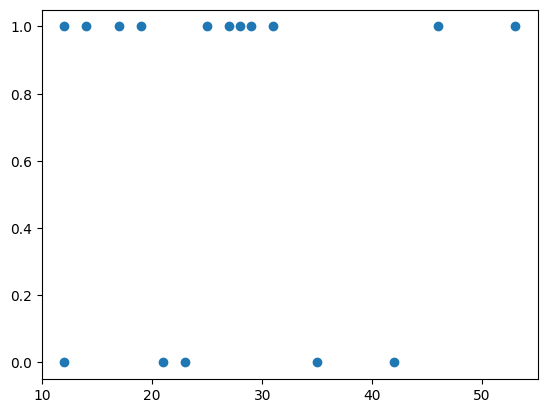

In [ ]:
plt.scatter(df.age, df.smartphone)

<Axes: xlabel='age', ylabel='smartphone'>

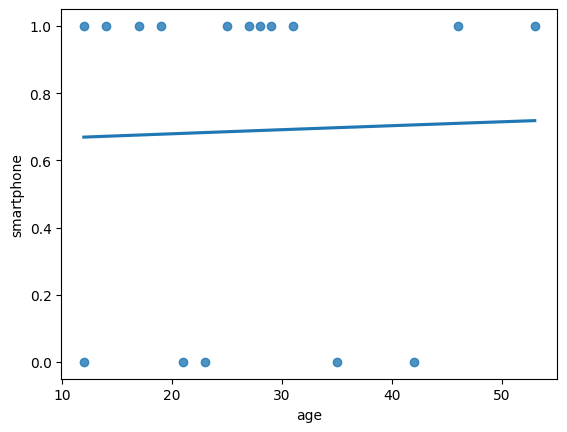

In [ ]:
sns.regplot(x=df.age, y = df.smartphone, data = df, logistic = True, ci = None)